In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/umangkejriwal1122/Youtube/master/titanic.csv') 

In [32]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


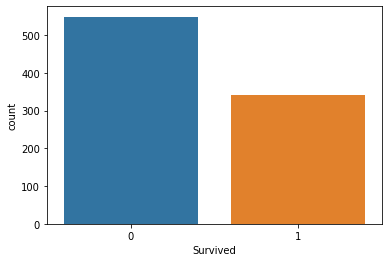

In [34]:
sns.countplot(x='Survived',data = titanic_data)
plt.show()

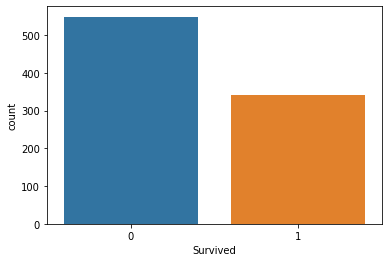

In [35]:
sns.countplot(titanic_data['Survived'])
plt.show()

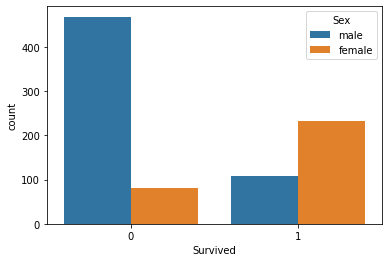

In [36]:
sns.countplot(x='Survived',hue = "Sex", data = titanic_data)
plt.show()

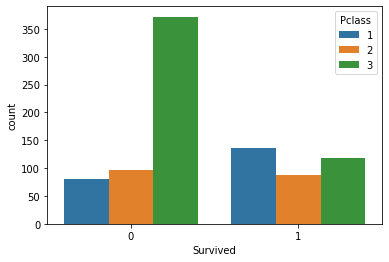

In [37]:
sns.countplot(x='Survived',hue = "Pclass", data = titanic_data)
plt.show()

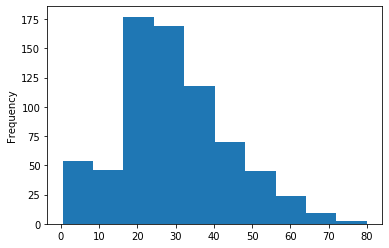

In [38]:
### age analysis

titanic_data['Age'].plot.hist()

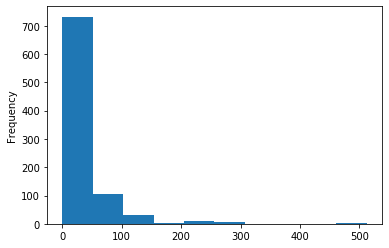

In [39]:
### age analysis

titanic_data['Fare'].plot.hist()

### data wrangling

In [40]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
titanic_data.drop("Cabin",axis=1,inplace=True)

In [42]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [43]:
import numpy as np
mean = titanic_data['Age'].mean()
mean = np.round(mean,2)
mean

29.7

In [44]:
titanic_data['Age'] = titanic_data['Age'].fillna(mean)

In [45]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [47]:
titanic_data.dropna(inplace=True)

In [48]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [49]:
titanic_data.drop(["PassengerId","Name","Ticket","Parch","SibSp","Embarked"],axis=1,inplace=True)

In [50]:
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [53]:
sex = pd.get_dummies(titanic_data["Sex"],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [55]:
pclass = pd.get_dummies(titanic_data["Pclass"],drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [56]:
titanic_data = pd.concat([titanic_data,sex,pclass],axis=1)
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare,male,2,3
0,0,3,male,22.0,7.2500,1,0,1
1,1,1,female,38.0,71.2833,0,0,0
2,1,3,female,26.0,7.9250,0,0,1
3,1,1,female,35.0,53.1000,0,0,0
4,0,3,male,35.0,8.0500,1,0,1


In [57]:
titanic_data.drop(["Pclass","Sex"],axis=1,inplace=True)
titanic_data.head()

,Survived,Age,Fare,male,2,3
0,0,22.0,7.2500,1,0,1
1,1,38.0,71.2833,0,0,0
2,1,26.0,7.9250,0,0,1
3,1,35.0,53.1000,0,0,0
4,0,35.0,8.0500,1,0,1


In [60]:
titanic_data = titanic_data.rename(columns = {"male":"sex",2:"pclass_1",3:"pclass_2"})
titanic_data

,Survived,Age,Fare,sex,pclass_1,pclass_2
0,0,22.0,7.2500,1,0,1
1,1,38.0,71.2833,0,0,0
2,1,26.0,7.9250,0,0,1
3,1,35.0,53.1000,0,0,0
4,0,35.0,8.0500,1,0,1
5,0,29.7,8.4583,1,0,1
6,0,54.0,51.8625,1,0,0
7,0,2.0,21.0750,1,0,1
8,1,27.0,11.1333,0,0,1
9,1,14.0,30.0708,0,1,0
